### Project Week 04
名企BI班 week04 谢 雅楠 20200919

1. 奇异值分解SVD的原理是怎样的，都有哪些应用场景？  
奇异值分解：将非对称方阵转化为对称方阵。    
应用：将user-item评分问题，转化为SVD矩阵分解。

2. funkSVD, BiasSVD，SVD++算法之间的区别是怎样的?  
1 FunkSVD算法思想：  
我们需要设置k，来对矩阵近似求解,矩阵补全以后，再预测，实际上噪音大。矩阵分解之后的还原，只需要关注与原来矩阵中有值的位置进行对比即可，不需要对所有元素进行对比。  
2 BiasSVD算法原理：  
用户有自己的偏好(Bias)，比如乐观的用户打分偏高；商品也有自己的偏好(Bias)，比如质量好的商品，打分偏高；将与个性化无关的部分，设置为偏好(Bias)部分。  
3 SVD++算法原理：  
在BiasSVD算法基础上进行了改进，考虑用户的隐式反馈。  


3. 矩阵分解算法在推荐系统中有哪些应用场景，存在哪些不足？  
应用场景： 将user-item评分问题，转化为SVD矩阵分解。   
不足： 矩阵往往是稀疏的，大量缺失值 => 计算量大；填充方式简单粗暴 => 噪音大


4. 假设一个小说网站，有N部小说，每部小说都有摘要描述。如何针对该网站制定基于内容的推荐系统，即用户看了某部小说后，推荐其他相关的小说。原理和步骤是怎样的？  
将小说的摘要描述进行分词，使用tf-idf提取文本特征，计算其他小说与用户看过的小说的相似度，推荐相似度高的小说。  
原理是基于内容的推荐，为每个item抽取出features，利用一个用户过去喜欢（不喜欢）的item的特征数据，来学习该用户的喜好特征（profile），通过用户profile与候选item的特征，推荐相关性最大的item，生成推荐列表。


5. Word2Vec的应用场景有哪些？ 
在推荐系统中，计算商品的相似度，将商品看作一个词，将用户的一类行为序列看作一个文档，通过word2vec将其训练为一个向量。（https://www.zhihu.com/question/25269336 ）

#### Action1
选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像

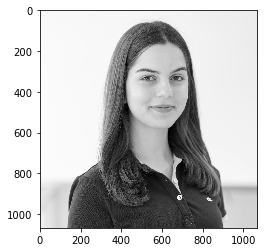

(1068, 1068)

In [10]:
from scipy.linalg import svd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 加载图片
image = Image.open('iimage.jpg').convert('L')
A = np.array(image)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
A.shape

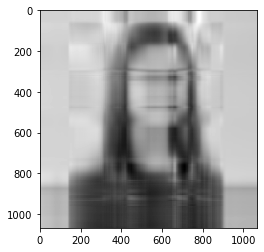

[[-0.17439192 -0.16179478 -0.18242052 ...  0.36841503  0.3721681
   0.37572471]
 [-0.13579851 -0.12320466 -0.1438425  ...  0.40454676  0.40828952
   0.4118374 ]
 [-0.13605376 -0.12345985 -0.14409722 ...  0.40430866  0.40805167
   0.41159976]
 ...
 [11.84213014 11.90323163 12.1879018  ...  3.7676762   4.01022752
   4.21598521]
 [11.75981714 11.82094445 12.10564701 ...  3.6796551   3.92230218
   4.12813903]
 [11.62863654 11.68978581 11.97465593 ...  3.56284894  3.8056238
   4.01156847]]


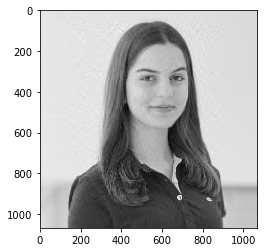

[[ 0.12436231  0.11588559  0.10482597 ...  0.26734647  0.27985648
   0.29064569]
 [ 0.16235539  0.15388137  0.14281808 ...  0.30350142  0.31598823
   0.32675847]
 [ 0.16220358  0.15372866  0.14266475 ...  0.30332851  0.31581971
   0.32659325]
 ...
 [ 0.02347078  0.20497599  0.87616826 ... -0.71869105 -0.71964971
  -0.70314385]
 [ 0.25411753  0.43771125  1.09668851 ... -0.72367093 -0.70885169
  -0.67911328]
 [ 0.64203435  0.82748816  1.46367022 ... -0.51769399 -0.47716697
  -0.42999454]]


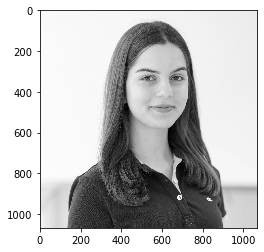

[[-0.05016954 -0.05043304 -0.06069032 ...  0.09852297  0.09931107
   0.10210206]
 [-0.01302022 -0.01377173 -0.02408508 ...  0.13450505  0.13535678
   0.13826853]
 [-0.01328569 -0.01405974 -0.02436113 ...  0.13426686  0.13512613
   0.13804269]
 ...
 [ 0.03756144  0.11468947  0.09861785 ...  0.05636559  0.00067332
  -0.04067758]
 [ 0.01790813  0.0419059   0.12278844 ...  0.00088921 -0.01327729
  -0.06217452]
 [ 0.02486845 -0.01282518  0.00175715 ... -0.13054238 -0.10699138
  -0.05920268]]


In [12]:
# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
    # 对于S，只保留前K个特征值
    s_temp = np.zeros(s.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(s.shape[0])
    # 用新的s_temp，以及p,q重构A
    temp = np.dot(p,s)
    temp = np.dot(temp,q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
    print(A-temp)
    
# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)
# 取前k个特征，对图像进行还原
get_image_feature(s, 5)
get_image_feature(s, 50)
get_image_feature(s, 500)

#### Action 2
使用Google Colab编辑器，对MovieLens数据集进行评分预测，计算RMSE（使用funkSVD, BiasSVD，SVD++)  

链接：https://colab.research.google.com/drive/1vF-Ny4mshQu8Qz5Xvx28aci46o1Wja9z?usp=sharing

#### Action3
"使用Gensim中的Word2Vec对三国演义进行Word Embedding，分析和曹操最相近的词有哪些，曹操+刘备-张飞=?  
数据集：three_kingdoms.txt"

In [2]:
# 对文件进行分词
import jieba
import os
from utils import files_processing

# 源文件所在目录
source_folder = 'three_kingdoms/source'
segment_folder = 'three_kingdoms/segment'

# 字词分割，对整个文件内容进行字词分割
def segment_lines(file_list,segment_out_dir,stopwords=[]):
    for i,file in enumerate(file_list):
        segment_out_name=os.path.join(segment_out_dir,'segment_{}.txt'.format(i))
        with open(file, 'rb') as f:
            document = f.read()
            document_cut = jieba.cut(document)
            sentence_segment=[]
            for word in document_cut:
                if word not in stopwords:
                    sentence_segment.append(word)
            result = ' '.join(sentence_segment)
            result = result.encode('utf-8')
            with open(segment_out_name, 'wb') as f2:
                f2.write(result)
                

# # 加载停用词
# with open("data/chinese_stopwords.txt", "r", encoding ="utf-8") as f:
#     stopwords = [i[:-1] for i in f.readlines()]

# 对source中的txt文件进行分词，输出到segment目录中
file_list=files_processing.get_files_list(source_folder, postfix='*.txt')
segment_lines(file_list, segment_folder)


Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_l/lr0wlf7d5ql5b7bxdxnjwvl40000gn/T/jieba.cache
Loading model cost 0.762 seconds.
Prefix dict has been built successfully.


In [7]:
# 将Word转换成Vec，然后计算相似度 
from gensim.models import word2vec
# import multiprocessing

# 如果目录中有多个文件，可以使用PathLineSentences
segment_folder = 'three_kingdoms/segment'
sentences = word2vec.PathLineSentences(segment_folder)

# 设置模型参数，进行训练
model = word2vec.Word2Vec(sentences, size=100, window=3, min_count=1)
model.wv.most_similar(positive=['曹操'])


[('孔明', 0.9957197308540344),
 ('关公', 0.9954901337623596),
 ('先主', 0.9930984973907471),
 ('孙权', 0.9924075603485107),
 ('甘当', 0.9911035299301147),
 ('岱', 0.9906236529350281),
 ('璋', 0.9902599453926086),
 ('夫人', 0.9901685118675232),
 ('众官', 0.989937424659729),
 ('不得不', 0.989894688129425)]